In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install scikeras

In [19]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [34]:
mode = 'dpll_preprocess'

In [35]:
# load dataset
df = pd.read_csv(f"/content/drive/MyDrive/cs257_23fall/{mode}/result_normalized.csv")
dataset = df.values
X = dataset[:, :-1].astype(float)
Y = dataset[:, -1]
print(X.shape)
print(Y.shape)

(139, 66)
(139,)


In [ ]:
# np.nonzero(np.isnan(X))
# print(df.iloc[:,55])
# print(X[:,55])

In [36]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)
# print(dummy_y)

In [37]:
def model(l1, l2):
  # define the keras model
  model = Sequential()
  model.add(Dense(l1, input_shape=(66,), activation='relu'))
  model.add(Dense(l2, activation='relu'))
  model.add(Dense(4, activation='softmax'))
  # compile the keras model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


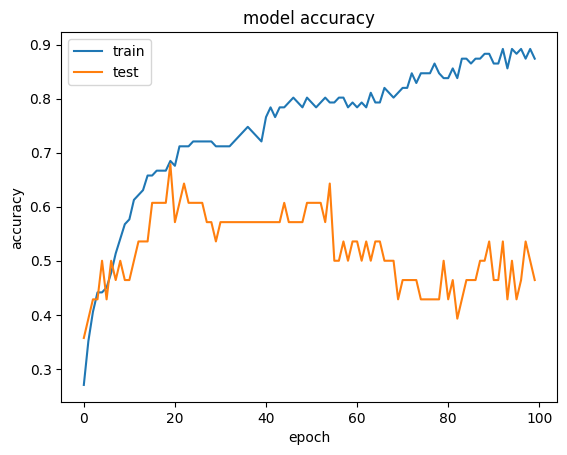

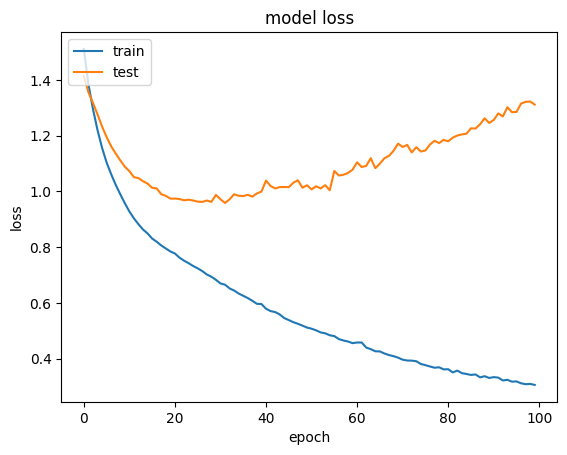

In [43]:
# Fit the model
history = model(8,8).fit(X, dummy_y, validation_split=0.2, epochs=100, batch_size=5, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
for l1 in [32, 16, 8, 4]:
  for l2 in [16, 8, 4]:
    if l1 < l2:
      continue
    estimator = KerasClassifier(model=model(l1,l2), epochs=100, batch_size=5, verbose=0)
    kfold = KFold(n_splits=10, shuffle=True)
    results = cross_val_score(estimator, X, dummy_y, cv=kfold)
    print(f"l1: {l1}, l2: {l2}:")
    print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

l1: 32, l2: 16:
Baseline: 51.81% (14.22%)


l1: 32, l2: 8:
Baseline: 53.19% (16.18%)
l1: 32, l2: 4:
Baseline: 48.79% (14.28%)


l1: 16, l2: 16:
Baseline: 44.73% (9.62%)
l1: 16, l2: 8:
Baseline: 47.36% (9.28%)
l1: 16, l2: 4:
Baseline: 42.53% (16.34%)


l1: 8, l2: 8:
Baseline: 50.49% (16.78%)
l1: 8, l2: 4:
Baseline: 51.15% (19.99%)


l1: 4, l2: 4:
Baseline: 45.38% (9.88%)
